<a href="https://colab.research.google.com/github/nagayoshi3/deep_learning_practice/blob/master/3_1_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTMを用いた時系列データ分析

航空機の月別の乗客数データを使います。
過去4ヶ月の乗客数から、次の乗客数を予測する。

## データの取得

In [0]:
!wget https://www.dropbox.com/s/l7lz1wwftbo8fwt/international-airline-passengers.csv?dl=0


%matplotlib inline

import pandas as pd

dataframe = pd.read_csv('international-airline-passengers.csv?dl=0', engine='python', skipfooter=3)
print(dataframe)


%matplotlib inline

import pandas as pd

# データの読み込み（データセット中のYのみロード）
dataframe = pd.read_csv('international-airline-passengers.csv?dl=0', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values.astype('float32')



from sklearn.preprocessing import MinMaxScaler

# [0,1]に正規化
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


# 訓練データとテストデータを分割（時系列の予測が目的のため、ある時点から先をテストデータとする）
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


import numpy as np

# X=[data[t-look_back],...,data[t-1]], Y=data[t]となるデータセットに変換
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)


look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# [samples, time steps, features]へ変形
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

--2019-11-03 12:40:32--  https://www.dropbox.com/s/l7lz1wwftbo8fwt/international-airline-passengers.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/l7lz1wwftbo8fwt/international-airline-passengers.csv [following]
--2019-11-03 12:40:32--  https://www.dropbox.com/s/raw/l7lz1wwftbo8fwt/international-airline-passengers.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1dc8884af37b1ead2ce4ad6ee1.dl.dropboxusercontent.com/cd/0/inline/Arp0bpY3-sa6118Ki5OS2EgnIn0unobjFVdCMuJVpg15n45YT3NPaTo4qwylgcV9wKXmIuVhqZfrMeZsbxxOSYeaYcep5LTKy4Tr9iSOIXQ-Tg/file# [following]
--2019-11-03 12:40:32--  https://uc1dc8884af37b1ead2ce4ad6ee1.dl.dropboxusercontent.com/cd/0/inline/Arp0bpY3-sa6118Ki5OS2EgnIn0unobjFVdCMuJVpg15n45YT3NPaTo4qw

## モデルの構築

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, LSTM


model = Sequential()

hidden_layer=4
model.add(LSTM(hidden_layer, input_shape=(look_back, 1))) # input_shape=(系列長T, x_tの次元), output_shape=(units,)
# LSTMの層を追加
# hidden_layer: 隠れ層の数　ここでは4としている。

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f81282bd3c8>>

## モデルの学習

In [0]:
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Train on 92 samples
Epoch 1/100
92/92 - 1s - loss: 0.0217
Epoch 2/100
92/92 - 0s - loss: 0.0101
Epoch 3/100
92/92 - 0s - loss: 0.0088
Epoch 4/100
92/92 - 0s - loss: 0.0075
Epoch 5/100
92/92 - 0s - loss: 0.0065
Epoch 6/100
92/92 - 0s - loss: 0.0057
Epoch 7/100
92/92 - 0s - loss: 0.0051
Epoch 8/100
92/92 - 0s - loss: 0.0047
Epoch 9/100
92/92 - 0s - loss: 0.0045
Epoch 10/100
92/92 - 0s - loss: 0.0040
Epoch 11/100
92/92 - 0s - loss: 0.0039
Epoch 12/100
92/92 - 0s - loss: 0.0037
Epoch 13/100
92/92 - 0s - loss: 0.0037
Epoch 14/100
92/92 - 0s - loss: 0.0036
Epoch 15/100
92/92 - 0s - loss: 0.0036
Epoch 16/100
92/92 - 0s - loss: 0.0037
Epoch 17/100
92/92 - 0s - loss: 0.0036
Epoch 18/100
92/92 - 0s - loss: 0.0036
Epoch 19/100
92/92 - 0s - loss: 0.0036
Epoch 20/100
92/92 - 0s - loss: 0.0037
Epoch 21/100
92/92 - 0s - loss: 0.0037
Epoch 22/100
92/92 - 0s - loss: 0.0036
Epoch 23/100
92/92 - 0s - loss: 0.0036
Epoch 24/100
92/92 - 0s - loss: 0.0036
Epoch 25/100
92/92 - 0s - loss: 0.0036
Epoch 26/100
9

## 評価

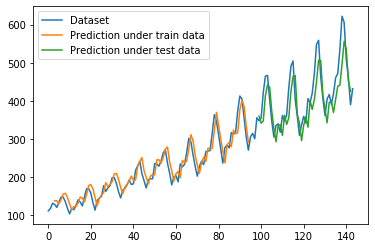

In [0]:
import math
from sklearn.metrics import mean_squared_error

# テストデータに対する予測（評価のため訓練データも）
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 正規化を元に戻す
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

import matplotlib.pyplot as plt

# 訓練データ部分の予測データ
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# テストデータ部分の予測データ
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset), label='Dataset')
plt.plot(trainPredictPlot, label='Prediction under train data')
plt.plot(testPredictPlot, label='Prediction under test data')
plt.legend()
plt.show()